# Продвинутые темы

Освоив основы, мы можем перейти к инструментам, которые позволяют работать с более сложными и реалистичными ситуациями.

## Функции многих переменных и Градиент

До сих пор мы рассматривали функции вида $y = f(x)$, где один вход ($x$) определял один выход ($y$). Но в реальном мире результат почти всегда зависит от множества факторов.

Например, цена дома ($z$) зависит от его площади ($x$) и удаленности от центра города ($y$). Это **функция многих переменных**, которая записывается как $z = f(x, y)$.

Ее график — это уже не кривая, а **поверхность** в трехмерном пространстве.

Вместо обычной производной здесь появляется понятие **частной производной**.
*   **Частная производная по $x$ ($\frac{\partial f}{\partial x}$)**: Мы "замораживаем" все остальные переменные (считаем их константами) и смотрим, как быстро меняется функция, если двигаться только вдоль оси $x$.
*   **Частная производная по $y$ ($\frac{\partial f}{\partial y}$)**: То же самое, но двигаемся только вдоль оси $y$.

Набор всех частных производных функции $\nabla f = (\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y})$ называется **градиентом**. Градиент — это вектор, который всегда указывает в сторону **наискорейшего роста** функции. Именно поэтому он так важен в машинном обучении: чтобы минимизировать ошибку, мы делаем шаг в направлении, **противоположном** градиенту (этот метод называется градиентным спуском).

 Давайте это визуализируем. Рассмотрим функцию:

  $f(x, y) = \sin(\frac{1}{2}x^2 - \frac{1}{4}y^2 + 3) \cos(2x + 1 - e^y)$.

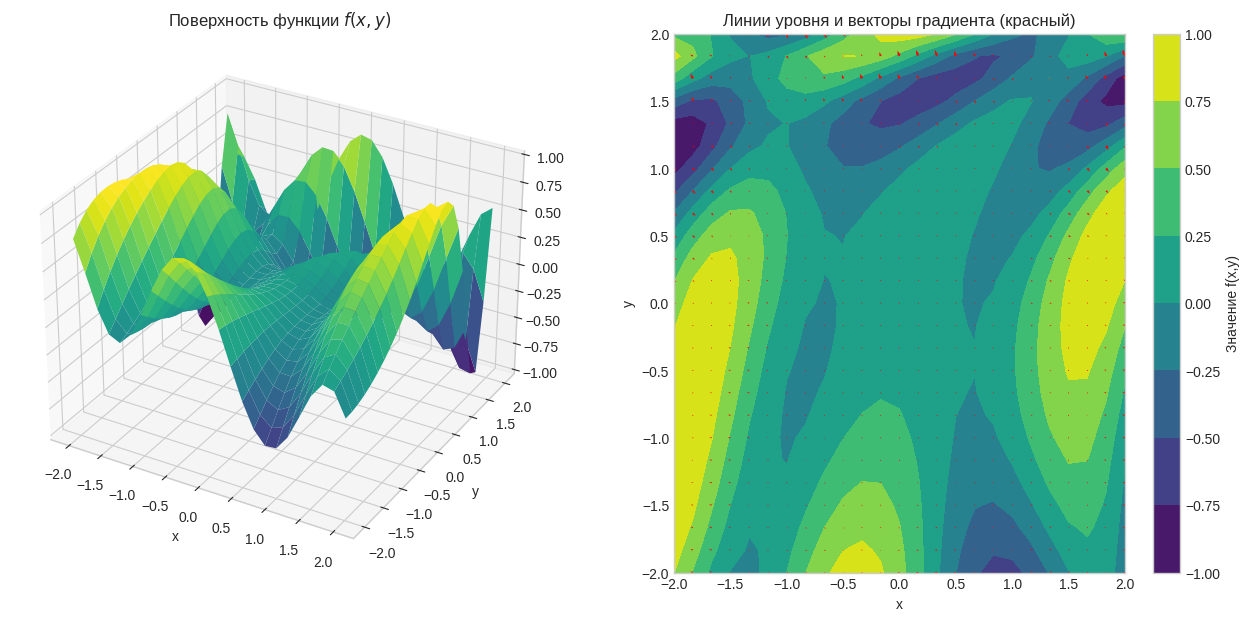

На 2D-графике видно, что красные стрелки (градиент) всегда перпендикулярны линиям уровня и указывают в сторону 'подъема' на гору.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp

# Настроим красивые графики
plt.style.use('seaborn-v0_8-whitegrid')

# Определяем функцию
def f(x, y):
    return np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2 * x + 1 - np.exp(y))

# Создаем сетку для 3D-графика
x = np.linspace(-2, 2, 25)
y = np.linspace(-2, 2, 25)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Вычисляем градиент (частные производные) численно
Gy, Gx = np.gradient(Z)

# 3D-график поверхности
fig = plt.figure(figsize=(16, 7))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax1.set_title('Поверхность функции $f(x, y)$')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# 2D-график (вид сверху) с векторами градиента
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, Z, cmap='viridis')
# Рисуем векторы градиента
ax2.quiver(X, Y, Gx, Gy, color='red', scale=50)
ax2.set_title('Линии уровня и векторы градиента (красный)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
fig.colorbar(contour, ax=ax2, label='Значение f(x,y)')

plt.show()

print("На 2D-графике видно, что красные стрелки (градиент) всегда перпендикулярны линиям уровня и указывают в сторону 'подъема' на гору.")

## Аппроксимация рядами Тейлора

Это невероятно мощная идея. **Ряд Тейлора** позволяет нам приблизить (аппроксимировать) любую сложную, "страшную" функцию в окрестности некоторой точки с помощью простого полинома (суммы степенных функций).

Зачем это нужно? Работать с полиномами гораздо проще, чем со сложными функциями (вроде $\sin(x)$ или $\log(x)$). Мы можем легко находить их производные и интегралы.

**Основная идея:** Если мы знаем значение функции $f(a)$ в точке $a$, а также значения всех ее производных в этой же точке ($f'(a)$, $f''(a)$ и т.д.), мы можем построить полином, который будет вести себя *очень похоже* на нашу функцию рядом с точкой $a$.

Формула выглядит так:

$
f(x) \approx f(a) + \frac{f'(a)}{1!}(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + \dots
$

Чем больше членов ряда (производных) мы берем, тем точнее наше приближение. Это фундаментальный инструмент, который используется повсюду, от калькуляторов (как они считают синусы) до сложных физических и экономических моделей.

Давайте аппроксимируем функцию $f(x) = \cos(x)$ в окрестности точки $a=0$.
Ее ряд Тейлора (Маклорена) выглядит так:

$
\cos(x) \approx 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \dots
$

Посмотрим, как полиномы разной степени приближают косинус.

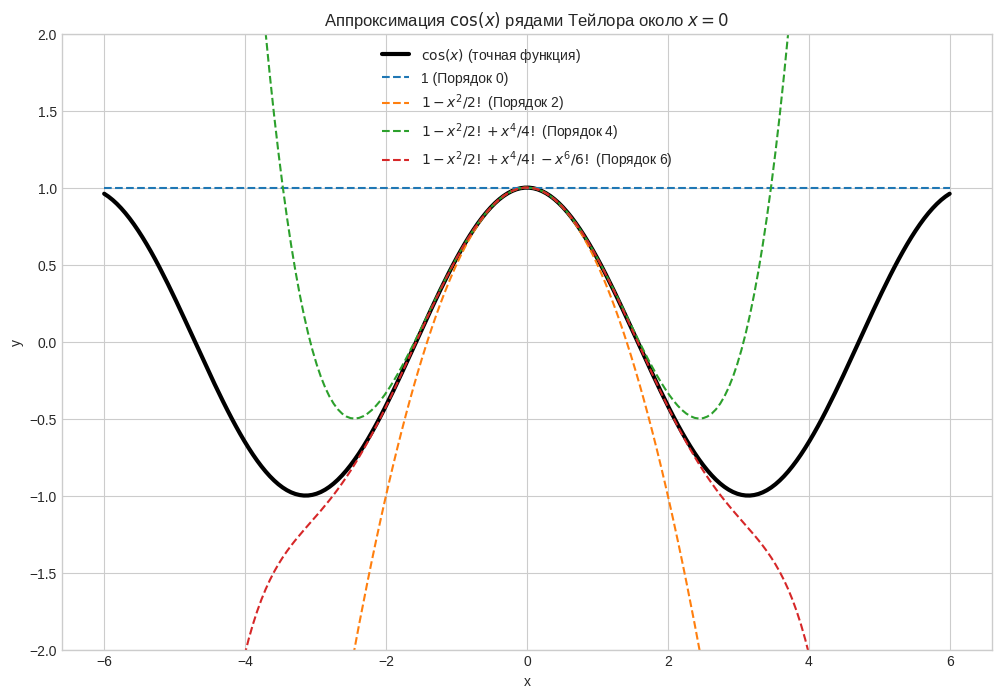

Видно, что чем больше членов ряда мы добавляем, тем на большем промежутке полином совпадает с исходной функцией.


In [4]:
x = np.linspace(-6, 6, 200)
y_cos = np.cos(x)

# Приближения Тейлора
y_t1 = 1                                      # 0-й порядок
y_t2 = 1 - x**2 / 2                           # 2-й порядок
y_t3 = 1 - x**2 / 2 + x**4 / 24               # 4-й порядок
y_t4 = 1 - x**2 / 2 + x**4 / 24 - x**6 / 720  # 6-й порядок

plt.figure(figsize=(12, 8))
plt.plot(x, y_cos, label='$\\cos(x)$ (точная функция)', linewidth=3, color='black')
plt.plot(x, y_t1 + np.zeros_like(x), '--', label='1 (Порядок 0)')
plt.plot(x, y_t2, '--', label='$1 - x^2/2!$ (Порядок 2)')
plt.plot(x, y_t3, '--', label='$1 - x^2/2! + x^4/4!$ (Порядок 4)')
plt.plot(x, y_t4, '--', label='$1 - x^2/2! + x^4/4! - x^6/6!$ (Порядок 6)')

plt.ylim(-2, 2)
plt.title('Аппроксимация $\\cos(x)$ рядами Тейлора около $x=0$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print("Видно, что чем больше членов ряда мы добавляем, тем на большем промежутке полином совпадает с исходной функцией.")

## Тригонометрические функции и периодичность

Функции $\sin(x)$, $\cos(x)$, $\tan(x)$ и другие описывают соотношения сторон в прямоугольном треугольнике. Но их истинная сила в другом: они **периодические**.

Именно это свойство делает их незаменимыми для моделирования любых процессов, которые повторяются во времени:
*   Колебания маятника
*   Звуковые волны
*   Сезонные продажи в бизнесе
*   Электрические сигналы

Любой сложный периодический сигнал можно разложить на сумму простых синусов и косинусов. Этот процесс называется **преобразованием Фурье** и является основой всей цифровой обработки сигналов. Когда вы слушаете MP3 или смотрите JPEG, вы пользуетесь результатами работы этих функций.

Давайте создадим сложный сигнал, сложив две синусоиды с разной частотой и амплитудой, а затем посмотрим на результат.

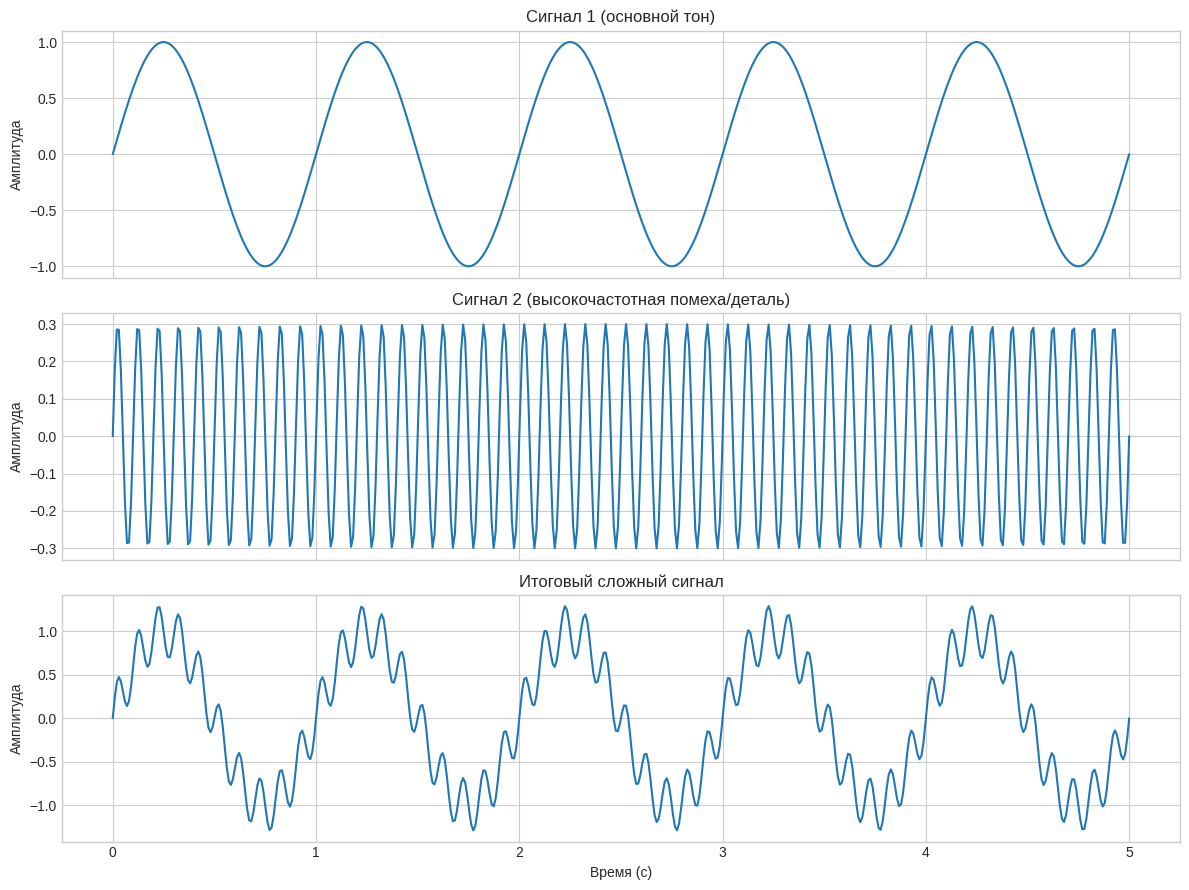

Этот пример иллюстрирует, как сложные периодические процессы могут быть разложены на простые синусоидальные компоненты. 
Преобразование Фурье делает обратную операцию — находит эти компоненты в сложном сигнале.


In [6]:
# Временная шкала
t = np.linspace(0, 5, 500)

# Компонент 1: Низкочастотный сигнал
freq1 = 1 # 1 Гц
amp1 = 1.0
signal1 = amp1 * np.sin(2 * np.pi * freq1 * t)

# Компонент 2: Высокочастотный сигнал с меньшей амплитудой
freq2 = 10 # 10 Гц
amp2 = 0.3
signal2 = amp2 * np.sin(2 * np.pi * freq2 * t)

# Итоговый сложный сигнал
complex_signal = signal1 + signal2

# Визуализация
fig, axs = plt.subplots(3, 1, figsize=(12, 9), sharex=True)

axs[0].plot(t, signal1)
axs[0].set_title('Сигнал 1 (основной тон)')
axs[0].set_ylabel('Амплитуда')

axs[1].plot(t, signal2)
axs[1].set_title('Сигнал 2 (высокочастотная помеха/деталь)')
axs[1].set_ylabel('Амплитуда')

axs[2].plot(t, complex_signal)
axs[2].set_title('Итоговый сложный сигнал')
axs[2].set_xlabel('Время (с)')
axs[2].set_ylabel('Амплитуда')

plt.tight_layout()
plt.show()

print("""Этот пример иллюстрирует, как сложные периодические процессы могут быть разложены на простые синусоидальные компоненты.
Преобразование Фурье делает обратную операцию — находит эти компоненты в сложном сигнале.""")